# 결정트리

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/wine_data'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

# 로지스틱회귀를 적용해서 품질을 분류

In [10]:
df['class'].value_counts(), np.unique(y_train, return_counts=True)

(1.0    4898
 0.0    1599
 Name: class, dtype: int64,
 (array([0., 1.]), array([1121, 3426], dtype=int64)))

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.7752364196173301, 0.7917948717948718)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [15]:
lr = LogisticRegression()
lr.fit(x_train_poly, y_train)
lr.score(x_train_poly, y_train), lr.score(x_test_poly, y_test)

(0.8119639322630305, 0.8261538461538461)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)

(0.9982405981966131, 0.8656410256410256)

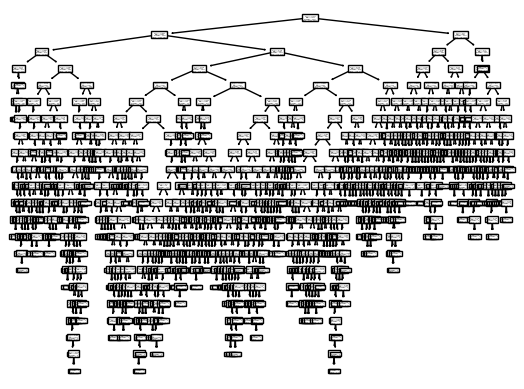

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

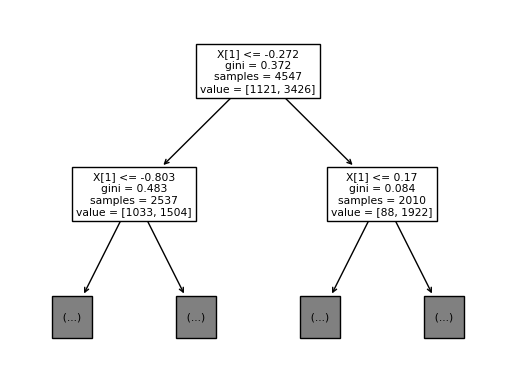

In [18]:
plot_tree(dt, max_depth=1)
plt.show()

### 불순도: gini계수 criterion 매개변수의 값 기본셋팅 - 노드를 분할하는 조건
### gini불순도: 1 - (음성클래스비율**2 + 양성클래스비율**2)
### 부모와 자식의 지니불순도의 차이가 크면 트리를 성장시킨다
### 과적합 해결 - 트리를 가지치기 즉 학습을 제한

In [21]:
from sklearn.tree import DecisionTreeClassifier
train_score, test_score = [], []
for d in range(1,21):
    dt = DecisionTreeClassifier(max_depth = d, random_state=0)
    dt.fit(x_train, y_train)
    train_score.append(dt.score(x_train, y_train))
    test_score.append(dt.score(x_test, y_test))

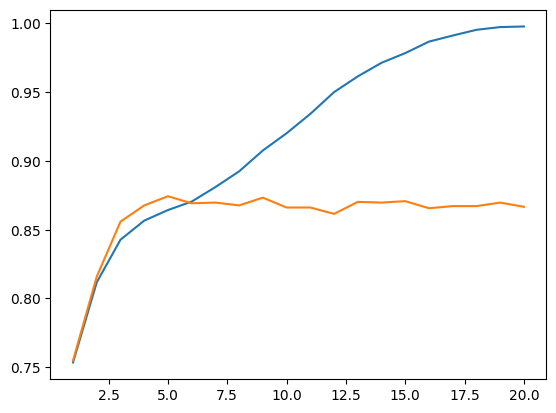

In [23]:
plt.plot(range(1,21),train_score,label='train')
plt.plot(range(1,21),test_score, label='test')

In [25]:
dt = DecisionTreeClassifier(max_depth = 6, random_state=0)
dt.fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)

(0.8704640422256433, 0.8692307692307693)

In [ ]:
plt.figure(figsize=(15,5))
plot_tree(dt, filled=True,

In [27]:
dt.feature_importances_, df.columns[:-1]

(array([0.16461284, 0.70244692, 0.13294025]),
 Index(['alcohol', 'sugar', 'pH'], dtype='object'))

### 머신러닝에서 random state값을 변경하면 데이터가 섞이는 정도가 변경되서 결과적으로 성능이 달라진다

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [31]:
x_train.shape, y_train.shape

((4157, 3), (4157,))

In [32]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_val, y_val)

(0.9980755352417608, 0.8365384615384616)

# 교차검증

In [33]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, X,Y)
scores

{'fit_time': array([0.00618005, 0.00548887, 0.00607657, 0.00621963, 0.0063839 ]),
 'score_time': array([0.00102448, 0.00100708, 0.00100303, 0.        , 0.        ]),
 'test_score': array([0.83230769, 0.79      , 0.81139338, 0.80369515, 0.82371055])}

In [37]:
np.mean(scores['test_score'])

0.8122213537040327

In [38]:
dt = DecisionTreeClassifier(random_state=0)

In [39]:
scores = cross_validate(dt,X,Y)
scores

{'fit_time': array([0.00752592, 0.00499797, 0.00651336, 0.00652075, 0.00650215]),
 'score_time': array([0.        , 0.00150442, 0.        , 0.        , 0.00101948]),
 'test_score': array([0.83230769, 0.79      , 0.81139338, 0.80369515, 0.82371055])}

# Cross Validate
    장점: 모델객체를 선택하고 바로 테스트할 수 있다 즉 최상의 점수를 가늠할 수 있다
    단점: 데이터를 섞지 않는다

# 데이터를 섞기 위해서는 분할기(splitter)를 지정
    회귀일때는 KFold 분할기
    분류일때는 StratifiedKFold 분할기

In [40]:
from sklearn.model_selection import StratifiedKFold
dt = DecisionTreeClassifier(random_state=0)
scores = cross_validate(dt,X,Y,cv=StratifiedKFold())
np.mean(scores['test_score'])

0.8122213537040327

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()
lr = LogisticRegression()
linear = LinearRegression()
kn = KNeighborsClassifier()

spliter = StratifiedKFold(n_splits=20)

dt_scores = cross_validate(dt,X,Y,cv=spliter)
lr_scores = cross_validate(lr,X,Y,cv=spliter)
linear_scores = cross_validate(linear,X,Y,cv=spliter)
kn_scores = cross_validate(kn,X,Y,cv=spliter)

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [44]:
np.mean(dt_scores['test_score']), np.mean(lr_scores['test_score']), np.mean(linear_scores['test_score']), np.mean(kn_scores['test_score'])

(0.8183955365622031, 0.7800693257359924, 0.208137028308158, 0.8400883190883193)

In [55]:
# 하이파 파라매터 튜닝은 그리드서치클래스가 제동하는 알고리즘을 이용
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':range(1,25),
    'min_samples_split':range(2,100,10),
    'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

In [56]:
dt = DecisionTreeClassifier(random_state=0)

In [57]:
gs = GridSearchCV(dt,param_grid=params,n_jobs=-1)

In [58]:
gs.fit(X,Y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 25),
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'min_samples_split': range(2, 100, 10)})

In [59]:
gs.best_params_, gs.best_score_

({'max_depth': 9, 'min_impurity_decrease': 0.0004, 'min_samples_split': 52},
 0.8527038550364185)

In [60]:
best_dt = gs.best_estimator_

In [61]:
best_dt.score(x_train, y_train)

0.8845321145056532

In [62]:
temp = DecisionTreeClassifier(random_state=0, max_depth=10, min_impurity_decrease=0.0005, min_samples_split=5)
temp.fit(x_train, y_train)
temp.score(x_train, y_train)

0.8833293240317537

In [63]:
gs.cv_results_['mean_test_score']

array([0.75388642, 0.75388642, 0.75388642, ..., 0.84747368, 0.84932078,
       0.84932078])

In [64]:
np.mean(gs.cv_results_['mean_test_score'])

0.8403880585657607

# 그리드 서치를 사용하는 방법
### 1. 탐색할 매개변수를 선택
### 2. 그리드 서치 수행
### 3. 최상의 모델을 저장
### 4. 사용

# 랜덤서치
    매개변수의 수치를 조정할때, 어느선에서 할지 결정하기 애매한 경우

In [65]:
from scipy.stats import uniform, randint

### 주어진 범위에서 고르게 값을 뽑는걸 균등 분포에서 샘플링한다

In [69]:
rgen = randint(0,10)
np.unique(rgen.rvs(100), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([10, 12, 10, 13, 13,  9,  6,  9, 10,  8], dtype=int64))

In [70]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.89538681, 0.55960879, 0.68126341, 0.28210279, 0.07492449,
       0.03973243, 0.82510811, 0.90634315, 0.77799582, 0.1842187 ])